In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-information-dataset/Animal Dataset.csv


![](https://i.natgeofe.com/n/51e55eeb-dfbe-4b43-9079-685ee97c449d/naturepl_01154678_16x9.jpg)

In [2]:
df = pd.read_csv('/kaggle/input/animal-information-dataset/Animal Dataset.csv') # import data from kaggle input

In [3]:
df.shape # getting the count of rows and columns in the dataframe

(205, 16)

![](https://images.unsplash.com/photo-1474511320723-9a56873867b5?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D)

In [4]:
 # checking the data 
df.head(10).style.set_properties(**{'background-color': 'yellow',
                           'color': 'black'})

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
5,Alpine Ibex,67-101,19-120,Brown,15-20,Herbivore,"Mountains, Alpine","Wolves, Golden Eagles",56-64,European Alps,Least Concern,Bovidae,150,56-64,Group-based,1
6,Amazon Rainforest Frog,2-13,Up to 0.5,Various,4-17,Insectivore,Amazon Rainforest,"Birds, Snakes",0.1-1,Amazon Rainforest,Not Evaluated,Dendrobatidae,10-15,0.8,Solitary,Up to 40
7,American Bison,152-186,"318-1,000",Brown,15-20,Herbivore,"Grasslands, Plains","Wolves, Grizzly Bears",40-56,North America,Near Threatened,Bovidae,270-290,56,Group-based,1
8,Anteater,52-91,22-41,"Brown, White",15-20,Insectivore,"Grasslands, Forests","Jaguars, Pumas",24,Central and South America,Least Concern,Myrmecophagidae,190-210,24,Solitary,1
9,Arabian Horse,140-160,380-1000,Various,25-30,Herbivore,"Middle East, North Africa","Humans, Predators",65,"Middle East, North Africa",Not Applicable,Equidae,330-342,65,Herd-based,1


In [5]:
pd.DataFrame(df.columns,columns=['column name']) # list of columns


,column name
0,Animal
1,Height (cm)
2,Weight (kg)
3,Color
4,Lifespan (years)
5,Diet
6,Habitat
7,Predators
8,Average Speed (km/h)
9,Countries Found


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

**Data Cleaning**

![](https://cdn.technologyadvice.com/wp-content/uploads/2022/06/Data-Cleaning-scaled.jpeg)

As we can see in the data numerci columns have '-' in between values we can replace such values with mean of the left and right values of the '-'.

In [7]:
df.columns

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Habitat', 'Predators', 'Average Speed (km/h)',
       'Countries Found', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth'],
      dtype='object')

In [8]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,140-160,500-1200,"Brown, Black",20-25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,215-280,24,Group-based,10-50
201,Yellow-Eyed Penguin,60-65,1-3,"Yellow, White",Up to 20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,80-90,25,Solitary,1
202,Yeti Crab,Up to 15,Up to 0.5,"White, Hairy",Up to 20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,220-340,400-900,"Black, White",20-25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,180-365,25,Group-based,5-20


First we will reomve all upto values in columns where it is present

In [9]:
columns_with_upto=['Height (cm)','Weight (kg)','Lifespan (years)','Offspring per Birth']

In [10]:
#pd.DataFrame(df['Height (cm)'][df['Height (cm)'].str.match(regex)]) #example of upto

In [11]:
for x in columns_with_upto:
    regex='Up.*'
    df[x][df[x].str.match(regex)]=df[x][df[x].str.match(regex)].str.split(' ',expand=True)[2]


We need to change the datatype of numeric columns as every column type is string datatype.

In [12]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,140-160,500-1200,"Brown, Black",20-25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,215-280,24,Group-based,10-50
201,Yellow-Eyed Penguin,60-65,1-3,"Yellow, White",20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,80-90,25,Solitary,1
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,220-340,400-900,"Black, White",20-25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,180-365,25,Group-based,5-20


In [13]:
df.columns

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Habitat', 'Predators', 'Average Speed (km/h)',
       'Countries Found', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth'],
      dtype='object')

In [14]:
for x in ['Height (cm)','Weight (kg)','Lifespan (years)','Average Speed (km/h)','Gestation Period (days)','Offspring per Birth','Top Speed (km/h)']:
    ab=df[x][df[x].str.contains('-')]
    df[x][df[x].str.contains('-')]=ab.str.split('-').str.get(-1)

In [15]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,130,65,Grey,30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,240,40,Solitary,1
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,"Grasslands, Savannas","Lions, Leopards",30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,5
2,African Elephant,310,6000,Grey,70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,660,40,Herd-based,1
3,African Lion,110,250,Tan,14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,105,80,Group-based,4 (usually)
4,African Wild Dog,80,36,Multicolored,12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,280,24,Group-based,50
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,90,25,Solitary,1
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,340,900,"Black, White",25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,365,25,Group-based,20


In [16]:
df['Offspring per Birth'][df['Offspring per Birth'].str.endswith('(usually)')]=3

In [17]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,130,65,Grey,30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,240,40,Solitary,1
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,"Grasslands, Savannas","Lions, Leopards",30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,5
2,African Elephant,310,6000,Grey,70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,660,40,Herd-based,1
3,African Lion,110,250,Tan,14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,105,80,Group-based,3
4,African Wild Dog,80,36,Multicolored,12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,Mountains,"Snow Leopards, Wolves",24,"Himalayas, Central Asia",Least Concern,Bovidae,280,24,Group-based,50
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,Coastal Areas,"Seals, Orcas",25,New Zealand,Endangered,Spheniscidae,90,25,Solitary,1
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Hydrothermal Vents,Not Applicable,Not Applicable,Pacific Ocean,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable
203,Zebra,340,900,"Black, White",25,Herbivore,Grasslands,"Lions, Hyenas",25,Africa,Least Concern,Equidae,365,25,Group-based,20


In [18]:
for x in ['Countries Found','Habitat','Predators']:
    # Split the 'Countries Found' column by commas into separate columns
    split_columns = df[x].str.split(', ', expand=True)

    # Rename the new columns with meaningful names (e.g., Country 1, Country 2)
    split_columns.columns = [f'{x} {i+1}' for i in range(split_columns.shape[1])]

    # Concatenate the split columns with the original DataFrame
    df = pd.concat([df, split_columns], axis=1)

    # Drop the original 'Countries Found' column
    df.drop(columns=[x], inplace=True)

In [19]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),...,Offspring per Birth,Countries Found 1,Countries Found 2,Countries Found 3,Countries Found 4,Habitat 1,Habitat 2,Habitat 3,Predators 1,Predators 2
0,Aardvark,130,65,Grey,30,Insectivore,40,Least Concern,Orycteropodidae,240,...,1,Africa,None,None,None,Savannas,Grasslands,None,Lions,Hyenas
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,30,Least Concern,Hyaenidae,90,...,5,Eastern and Southern Africa,None,None,None,Grasslands,Savannas,None,Lions,Leopards
2,African Elephant,310,6000,Grey,70,Herbivore,25,Vulnerable,Elephantidae,660,...,1,Africa,None,None,None,Savannah,Forest,None,Lions,Hyenas
3,African Lion,110,250,Tan,14,Carnivore,58,Vulnerable,Felidae,105,...,3,Africa,None,None,None,Grasslands,Savannas,None,Hyenas,Crocodiles
4,African Wild Dog,80,36,Multicolored,12,Carnivore,56,Endangered,Canidae,70,...,12,Sub-Saharan Africa,None,None,None,Savannahs,None,None,Lions,Hyenas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,24,Least Concern,Bovidae,280,...,50,Himalayas,Central Asia,None,None,Mountains,None,None,Snow Leopards,Wolves
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,25,Endangered,Spheniscidae,90,...,1,New Zealand,None,None,None,Coastal Areas,None,None,Seals,Orcas
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Not Applicable,Not Evaluated,Kiwaidae,Not Applicable,...,Not Applicable,Pacific Ocean,None,None,None,Hydrothermal Vents,None,None,Not Applicable,None
203,Zebra,340,900,"Black, White",25,Herbivore,25,Least Concern,Equidae,365,...,20,Africa,None,None,None,Grasslands,None,None,Lions,Hyenas


In [20]:
df['Countries Found 4'].replace('None',np.nan,inplace=True)
df['Countries Found 3'].replace('None',np.nan,inplace=True)
df['Countries Found 2'].replace('None',np.nan,inplace=True)


In [21]:
print(df['Countries Found 4'].isna().sum(),df['Countries Found 3'].isna().sum(),df['Countries Found 2'].isna().sum())

203 187 150


In [22]:
df.shape

(205, 22)

As we can see most of the countries columns - 'Country found 2','Country found 3,'Country found 4' have too many missing values thus dropping them.

In [23]:
df.drop(columns=['Countries Found 2','Countries Found 3','Countries Found 4'], inplace=True)

In [24]:
df = df.rename(columns={'Countries Found 1': 'Countries Found'})

In [25]:
df['Habitat 1'].replace('None',np.nan,inplace=True)
df['Habitat 2'].replace('None',np.nan,inplace=True)
df['Predators 1'].replace('None',np.nan,inplace=True)

df['Predators 2'].replace('None',np.nan,inplace=True)


In [26]:
print(df['Habitat 1'].isna().sum(),df['Habitat 2'].isna().sum(),df['Habitat 3'].isna().sum())

0 121 204


In [27]:
print(df['Predators 1'].isna().sum(),df['Predators 2'].isna().sum())

0 39


filling the same values in Habitat 2 from Habitat 1 where there is None.

In [28]:
df['Habitat 2'] = df['Habitat 2'].fillna(df['Habitat 1'])

Dropping Habitat 3 as it has lots of missing values which makes the column not usable

In [29]:
df.drop(columns=['Habitat 3'], inplace=True)

Filling the same values for predator 2 from predator 1 where there is no value

In [30]:
df['Predators 2'] = df['Predators 2'].fillna(df['Predators 1'])

In [31]:
df.shape

(205, 18)

we can drop column 

In [32]:
df

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth,Countries Found,Habitat 1,Habitat 2,Predators 1,Predators 2
0,Aardvark,130,65,Grey,30,Insectivore,40,Least Concern,Orycteropodidae,240,40,Solitary,1,Africa,Savannas,Grasslands,Lions,Hyenas
1,Aardwolf,50,14,Yellow-brown,12,Insectivore,30,Least Concern,Hyaenidae,90,40,Solitary,5,Eastern and Southern Africa,Grasslands,Savannas,Lions,Leopards
2,African Elephant,310,6000,Grey,70,Herbivore,25,Vulnerable,Elephantidae,660,40,Herd-based,1,Africa,Savannah,Forest,Lions,Hyenas
3,African Lion,110,250,Tan,14,Carnivore,58,Vulnerable,Felidae,105,80,Group-based,3,Africa,Grasslands,Savannas,Hyenas,Crocodiles
4,African Wild Dog,80,36,Multicolored,12,Carnivore,56,Endangered,Canidae,70,56,Group-based,12,Sub-Saharan Africa,Savannahs,Savannahs,Lions,Hyenas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yak,160,1200,"Brown, Black",25,Herbivore,24,Least Concern,Bovidae,280,24,Group-based,50,Himalayas,Mountains,Mountains,Snow Leopards,Wolves
201,Yellow-Eyed Penguin,65,3,"Yellow, White",20,Carnivore,25,Endangered,Spheniscidae,90,25,Solitary,1,New Zealand,Coastal Areas,Coastal Areas,Seals,Orcas
202,Yeti Crab,15,0.5,"White, Hairy",20,Omnivore,Not Applicable,Not Evaluated,Kiwaidae,Not Applicable,Not Applicable,Solitary,Not Applicable,Pacific Ocean,Hydrothermal Vents,Hydrothermal Vents,Not Applicable,Not Applicable
203,Zebra,340,900,"Black, White",25,Herbivore,25,Least Concern,Equidae,365,25,Group-based,20,Africa,Grasslands,Grasslands,Lions,Hyenas


**work on missing values and NULLS**

In [33]:
df.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Average Speed (km/h)       0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
Countries Found            0
Habitat 1                  0
Habitat 2                  0
Predators 1                0
Predators 2                0
dtype: int64

In [34]:
df.replace('Not Applicable',np.nan,inplace=True)

it is better to drop the data with missing values as replacing them with mean mode median values would not give accurate data for that animal.

In [35]:
df.dropna(inplace=True)

In [36]:
df[df['Height (cm)'].isna()]

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth,Countries Found,Habitat 1,Habitat 2,Predators 1,Predators 2


In [37]:
df.dropna(subset=['Height (cm)'],inplace=True)

In [38]:
df.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Average Speed (km/h)       0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
Countries Found            0
Habitat 1                  0
Habitat 2                  0
Predators 1                0
Predators 2                0
dtype: int64

In [39]:
df.dropna(inplace=True)

**fixing special character values for each columns**

In [40]:
df.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Average Speed (km/h)       0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
Countries Found            0
Habitat 1                  0
Habitat 2                  0
Predators 1                0
Predators 2                0
dtype: int64

In [41]:
df.loc[df['Height (cm)'] == '']

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Average Speed (km/h),Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth,Countries Found,Habitat 1,Habitat 2,Predators 1,Predators 2


In [42]:
df.drop(df[df['Height (cm)'] == ''].index,inplace= True)

In [43]:
df.replace(',', '', regex=True,inplace=True)

In [44]:
df.replace('Varies',np.nan,inplace=True)

In [45]:
df.dropna(inplace=True)

In [46]:
df['Lifespan (years)']=df['Lifespan (years)'].str.replace(r'\+', '', regex=True)

In [47]:
df['Average Speed (km/h)'][df['Average Speed (km/h)'].str.contains(r'.*water.*', regex=True)]=df['Average Speed (km/h)'][df['Average Speed (km/h)'].str.contains(r'.*water.*', regex=True)].str.split(" ",expand=True)[0]

In [48]:
df.replace(r'\(in burrow\)','',regex=True,inplace=True)

In [49]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*days.*', regex=True)]='10'

In [50]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*weeks.*', regex=True)]

129    9 weeks
Name: Gestation Period (days), dtype: object

In [51]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*weeks.*', regex=True)]=f'{9 * 7}'

In [52]:
df['Gestation Period (days)'][df['Gestation Period (days)'].str.contains(r'.*months.*', regex=True)]

23     42 months
32     12 months
37     12 months
54     14 months
81     18 months
103     8 months
121    16 months
Name: Gestation Period (days), dtype: object

In [53]:
df['Gestation Period (days)'] = df['Gestation Period (days)'].apply(
    lambda x: f'{int(x.split()[0]) * 30}' if 'months' in x else x
)



In [54]:
df['Offspring per Birth']=df['Offspring per Birth'].str.replace(r')',"")

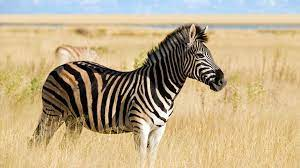

In [55]:
df['Offspring per Birth']=df['Offspring per Birth'].str.replace(r'Hundreds',"100")

In [56]:
# Initialize an empty list to store the non-convertible values
non_convertible_values = []

# Iterate through the column and attempt to convert to float
for value in df['Offspring per Birth']:
    try:
        float(value)
    except ValueError:
        non_convertible_values.append(value)

# Create a DataFrame containing the non-convertible values
df['Offspring per Birth'][df['Offspring per Birth'].isin(non_convertible_values)] = df['Offspring per Birth'][df['Offspring per Birth'].isin(non_convertible_values)].str.split(" ",expand=True)[0]


In [57]:
df.columns

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Average Speed (km/h)', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth', 'Countries Found', 'Habitat 1', 'Habitat 2',
       'Predators 1', 'Predators 2'],
      dtype='object')

To correct the data types of different columns

In [58]:
float_columns = ['Height (cm)','Weight (kg)','Lifespan (years)','Average Speed (km/h)','Gestation Period (days)','Top Speed (km/h)','Offspring per Birth']
for x in float_columns:    
    df[x] = df[x].str.replace('[a-zA-Z]', '', regex=True)
    df[x] = df[x].astype(float)


In [59]:
df['Height-to-Weight Ratio'] = df['Height (cm)'] / df['Weight (kg)']

![](https://d1jyxxz9imt9yb.cloudfront.net/animal/115/meta_image/regular/WR202206_GiraffeTranslocation_012_360559_reduced.jpg)

**EDA**

![](https://editor.analyticsvidhya.com/uploads/61798ti2.png)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 204
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Animal                   152 non-null    object 
 1   Height (cm)              152 non-null    float64
 2   Weight (kg)              152 non-null    float64
 3   Color                    152 non-null    object 
 4   Lifespan (years)         152 non-null    float64
 5   Diet                     152 non-null    object 
 6   Average Speed (km/h)     152 non-null    float64
 7   Conservation Status      152 non-null    object 
 8   Family                   152 non-null    object 
 9   Gestation Period (days)  152 non-null    float64
 10  Top Speed (km/h)         152 non-null    float64
 11  Social Structure         152 non-null    object 
 12  Offspring per Birth      150 non-null    float64
 13  Countries Found          152 non-null    object 
 14  Habitat 1                152 no

In [61]:
pd.DataFrame(df.describe()).style\
    .set_properties(**{'background-color': 'lightyellow',
                      'color': 'black'})

,Height (cm),Weight (kg),Lifespan (years),Average Speed (km/h),Gestation Period (days),Top Speed (km/h),Offspring per Birth,Height-to-Weight Ratio
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,150.000000,152.000000
mean,197.174342,904.983684,26.572368,37.679868,179.335526,39.012105,1428.120000,13.191480
std,390.641242,5233.232423,19.622801,21.812222,168.813230,22.340857,16342.907789,33.413931
min,5.000000,0.050000,4.000000,0.240000,10.000000,0.240000,1.000000,0.033333
25%,53.750000,6.000000,15.000000,24.000000,60.000000,24.000000,1.000000,0.647756
50%,90.500000,55.500000,20.000000,38.500000,138.000000,40.000000,1.500000,2.119371
75%,180.000000,312.500000,30.000000,55.000000,260.000000,56.000000,6.000000,10.434375
max,3200.000000,57000.000000,150.000000,120.000000,1260.000000,120.000000,200000.000000,250.000000


In [62]:
print("The average height for the animals are {:.1f}cm, 99% of animals have top speed less than {:.2f}km/hr or less, while the maximum weight for an animal is {}kg.".format(df['Height (cm)'].mean(), df['Top Speed (km/h)'].quantile(0.99), df['Weight (kg)'].max()))

The average height for the animals are 197.2cm, 99% of animals have top speed less than 103.33km/hr or less, while the maximum weight for an animal is 57000.0kg.


In [63]:
print('99 % of animals have height less than {:.1f}cm'.format(df['Height (cm)'].quantile(0.99)))

99 % of animals have height less than 2175.6cm


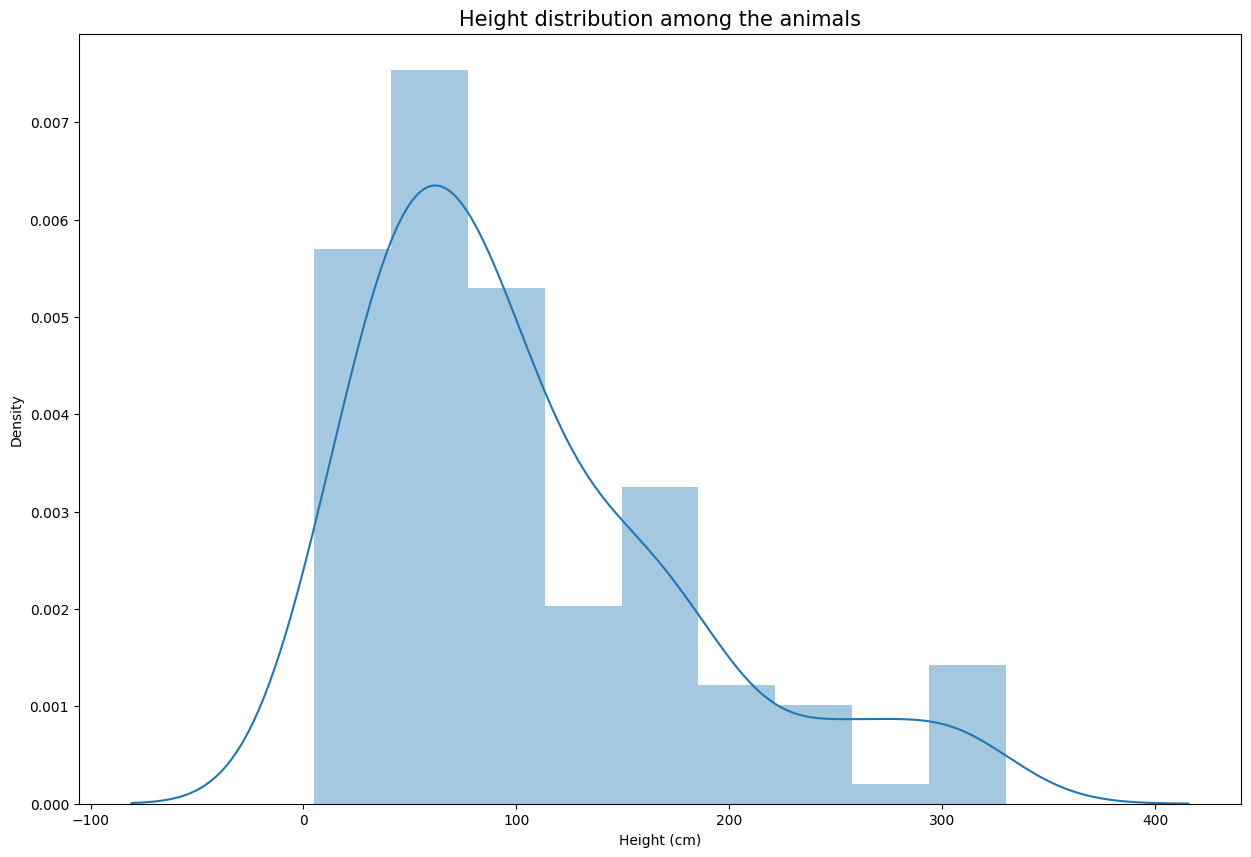

In [64]:
plt.figure(figsize=(15,10))
data = df.copy()
data=data[data['Height (cm)'] < data['Height (cm)'].quantile(0.90)]
sns.distplot(data['Height (cm)'].sort_values())
plt.title("Height distribution among the animals",fontsize=15)
plt.show()

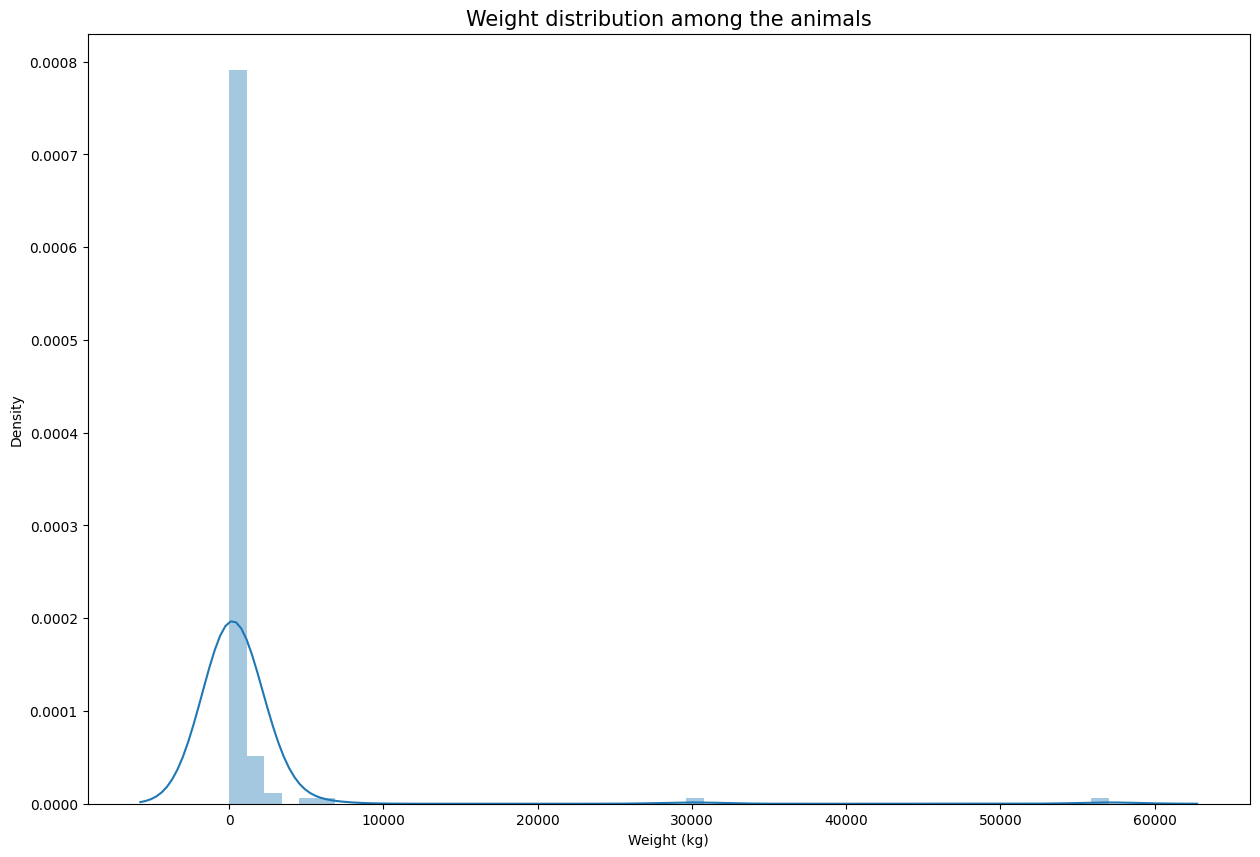

In [65]:
plt.figure(figsize=(15,10))
data2=df.copy()
data2=data2[data2['Weight (kg)'] < data2['Weight (kg)'].quantile(0.90)]
sns.distplot(df['Weight (kg)'].sort_values())
plt.title("Weight distribution among the animals",fontsize=15)
plt.show()

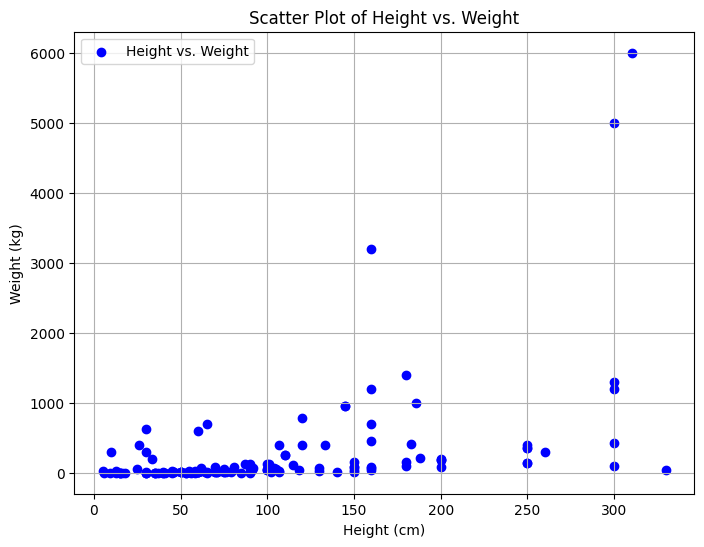

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Height (cm)'], data['Weight (kg)'], c='blue', marker='o', label='Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Height vs. Weight')
plt.legend()
plt.grid(True)
plt.show()

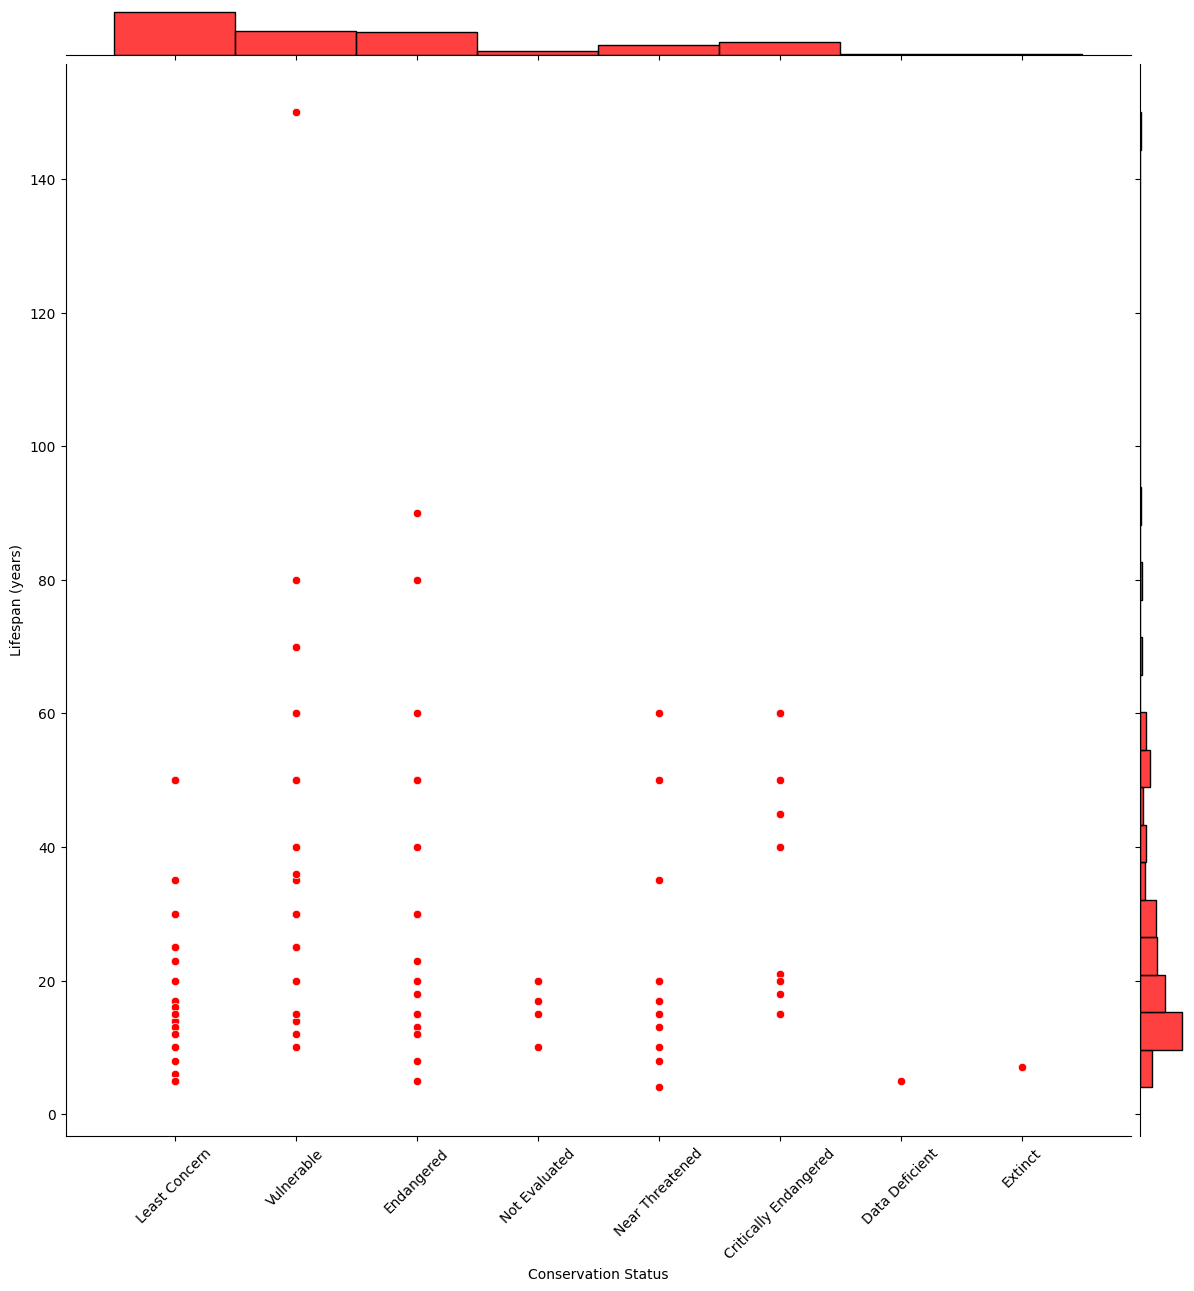

In [67]:
sns.jointplot(x="Conservation Status", y="Lifespan (years)", data=df, height=12, ratio=20, color="r")
plt.xticks(rotation=45)
plt.show()


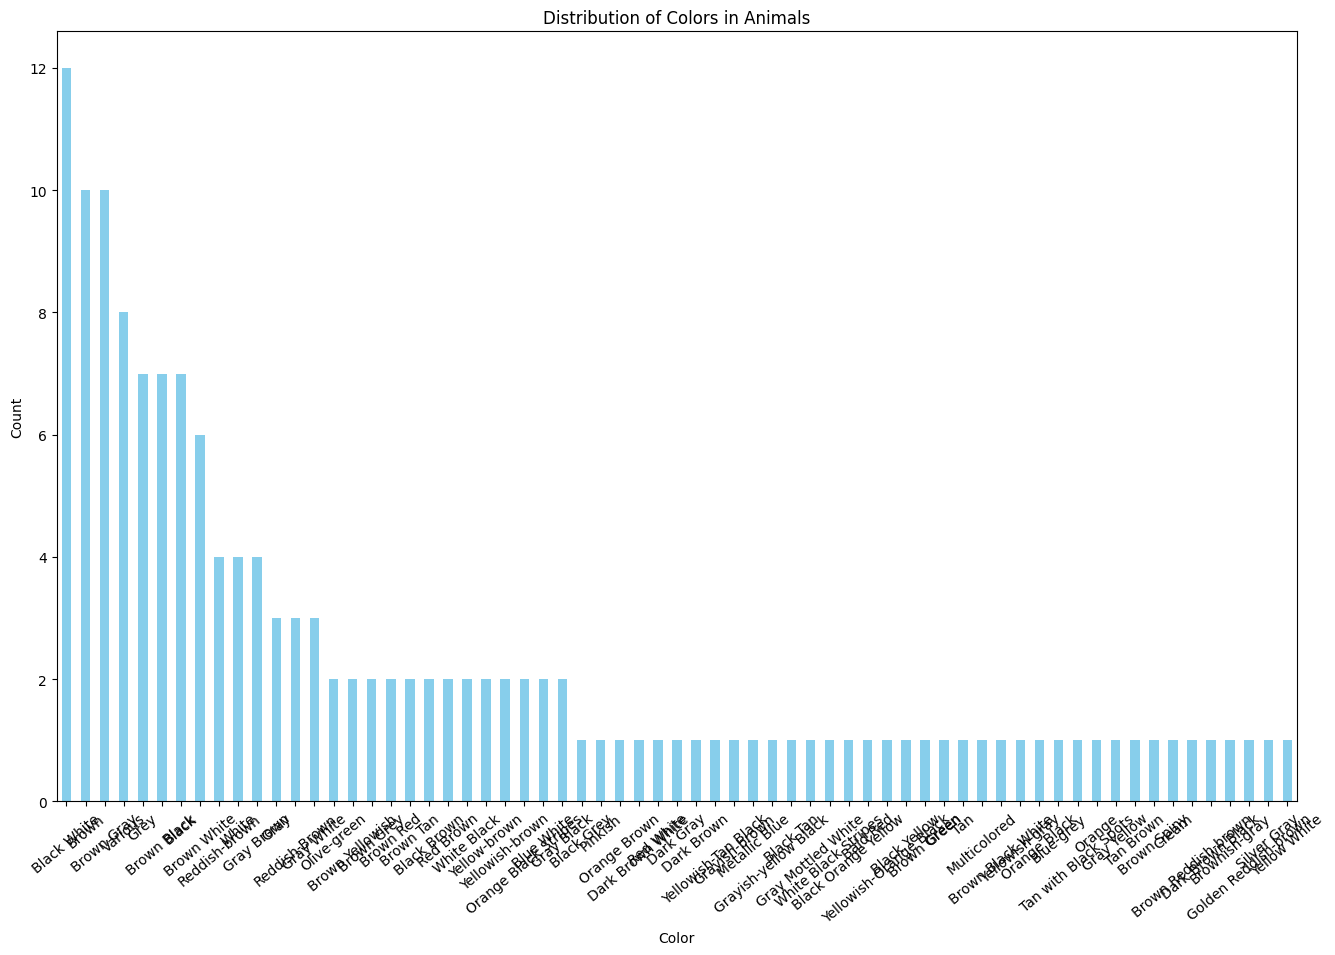

In [68]:
plt.figure(figsize=(16, 10))
df['Color'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Distribution of Colors in Animals')
plt.xticks(rotation=40)
plt.show()

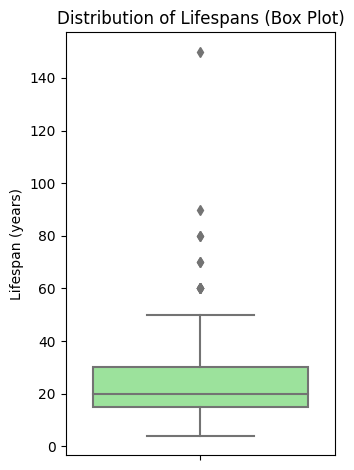

In [69]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Lifespan (years)', color='lightgreen')
plt.ylabel('Lifespan (years)')
plt.title('Distribution of Lifespans (Box Plot)')

# Adjust the layout
plt.tight_layout()
plt.show()

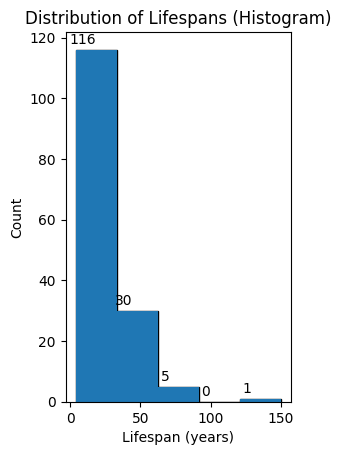

In [70]:
plt.subplot(1, 2, 2)
plt.hist(df['Lifespan (years)'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Lifespan (years)')
plt.ylabel('Count')
plt.title('Distribution of Lifespans (Histogram)')
# Get the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(df['Lifespan (years)'], bins=5)

# Annotate each bar with the count
for count, x in zip(counts, bin_edges):
    plt.text(x + 5, count + 1, str(int(count)), ha='center', va='bottom')


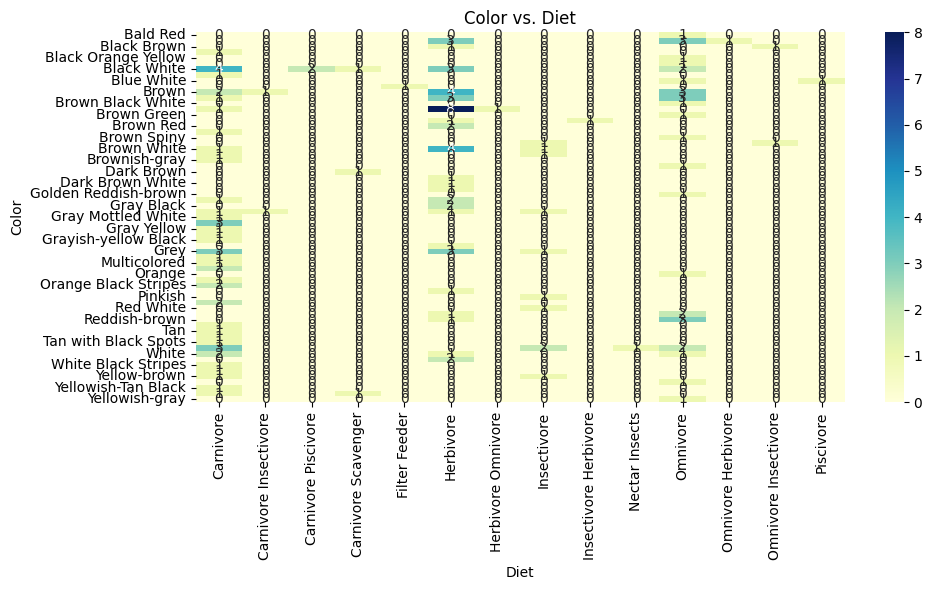

In [71]:
# Create a cross-tabulation of Color vs. Diet
color_diet = pd.crosstab(df['Color'], df['Diet'])

# Create a cross-tabulation of Color vs. Habitat
color_habitat = pd.crosstab(df['Color'], df['Habitat 1'])

# Set the figure size
plt.figure(figsize=(18, 6))

# Create a heatmap for Color vs. Diet
plt.subplot(1, 2, 1)
sns.heatmap(color_diet, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Color vs. Diet')

plt.tight_layout()

Text(0.5, 1.0, 'Color vs. Habitat 1')

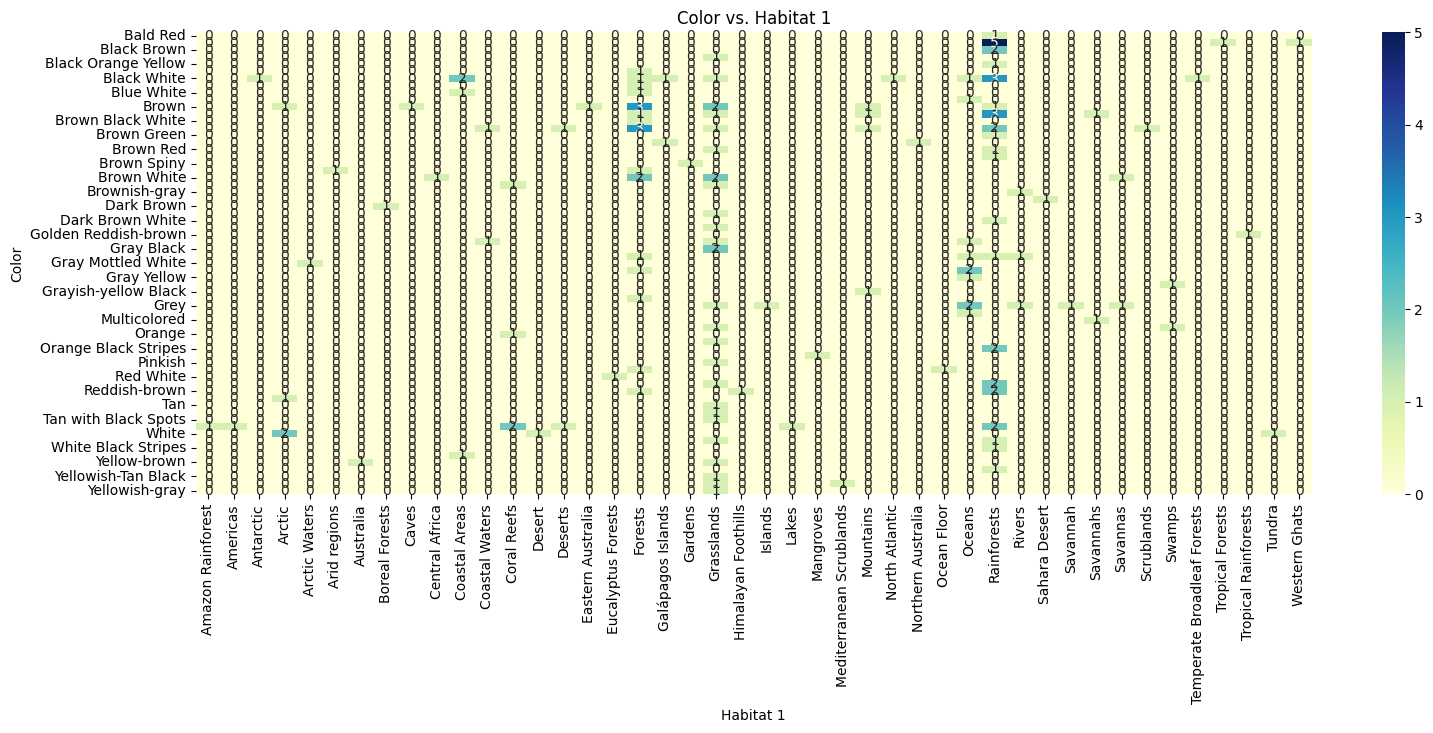

In [72]:
# Create a heatmap for Color vs. Habitat
plt.figure(figsize=(18, 6))
sns.heatmap(color_habitat, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Color vs. Habitat 1')
#plt.tight_layout()

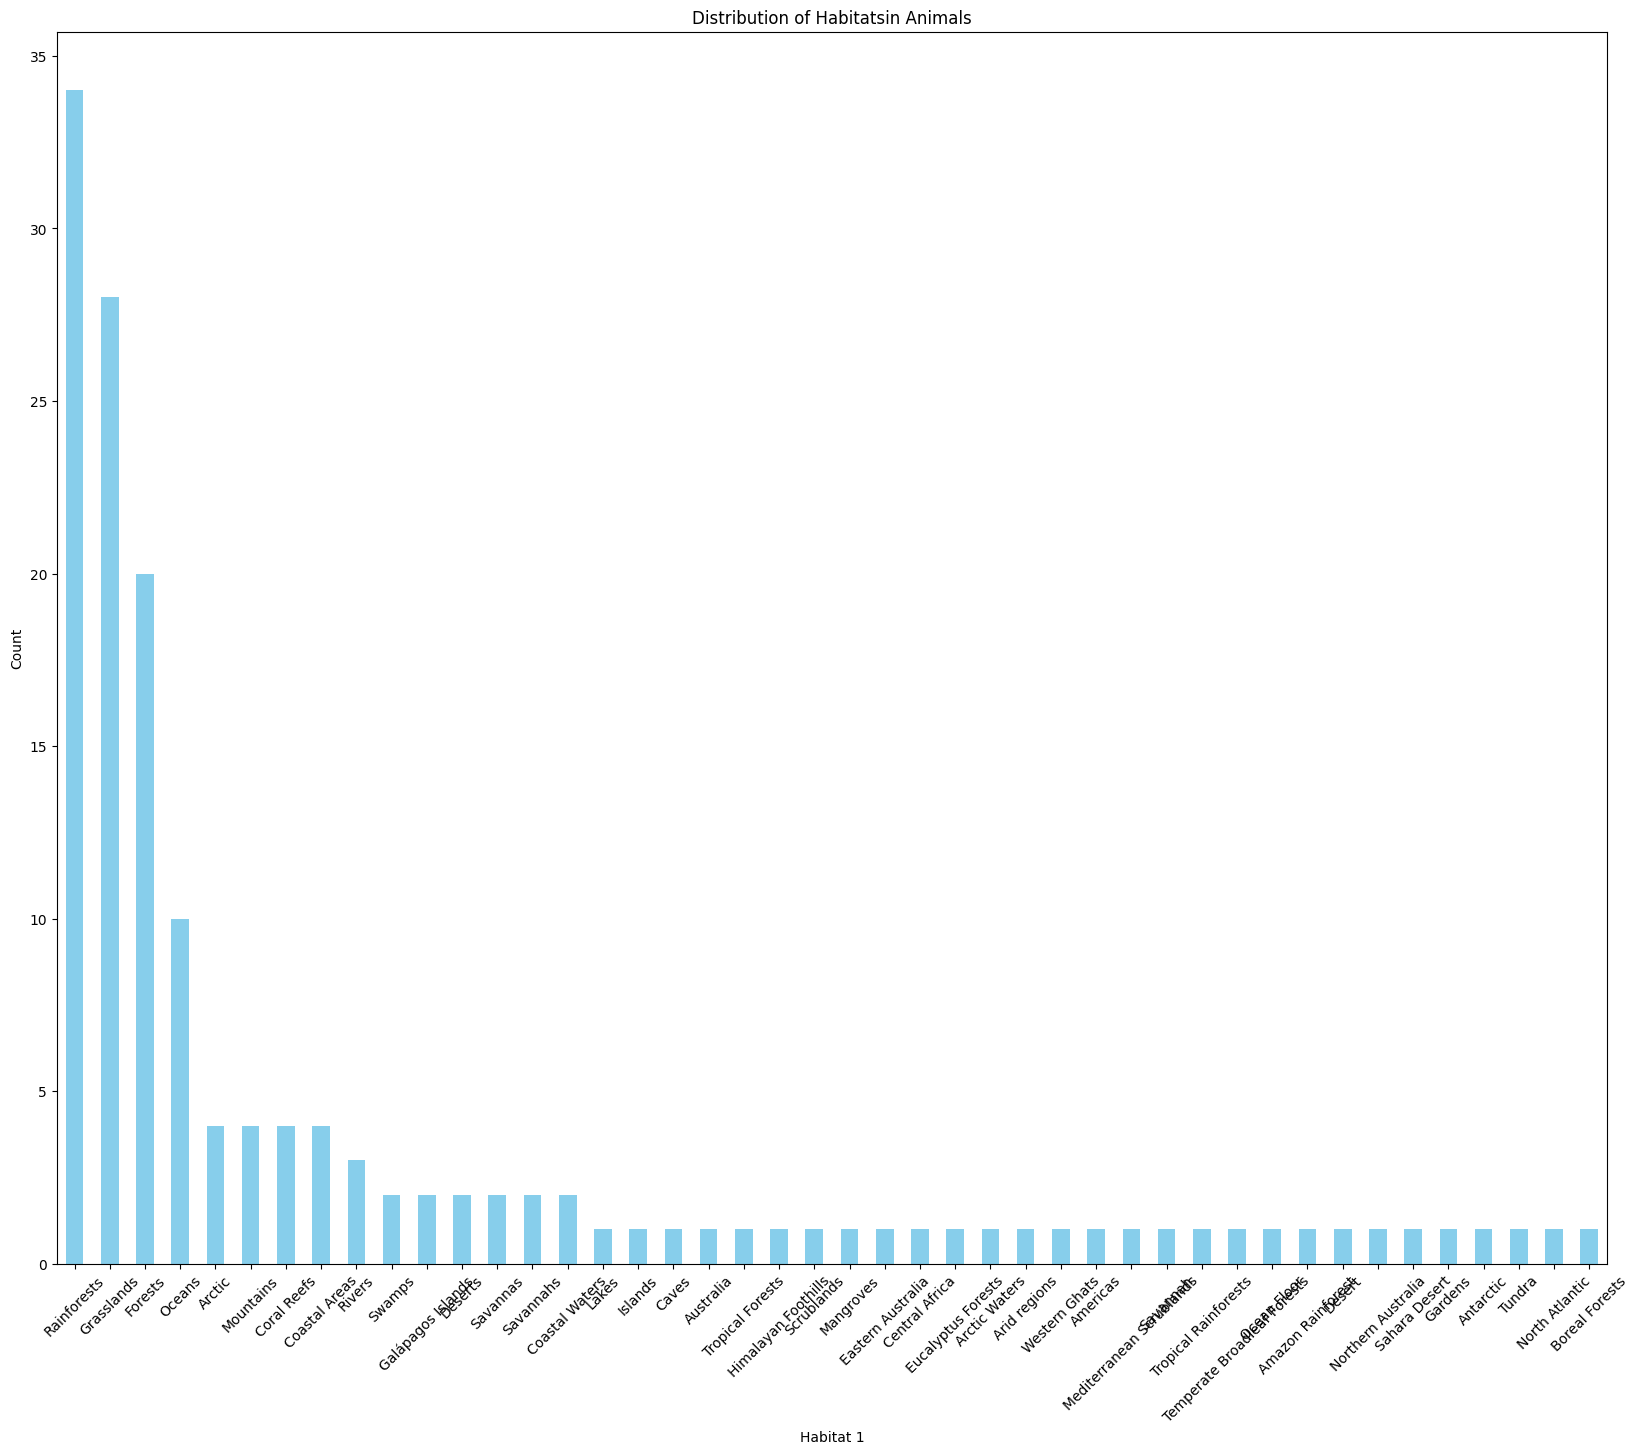

In [73]:
plt.figure(figsize=(20, 16))
df['Habitat 1'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Habitat 1')
plt.ylabel('Count')
plt.title('Distribution of Habitatsin Animals')
plt.xticks(rotation=45)
plt.show()

![](https://hips.hearstapps.com/hmg-prod/images/jaguar-getty-jpg-1567092694.jpg?crop=1xw:0.999755859375xh;center,top&resize=980:*)

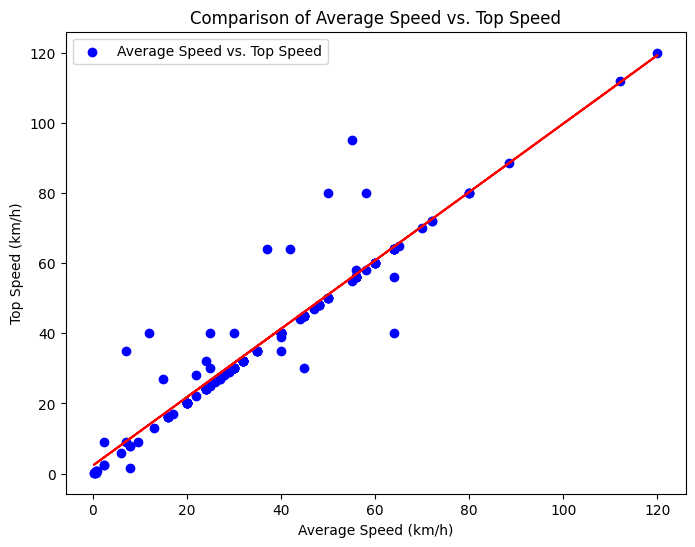

In [74]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot to compare Average Speed vs. Top Speed
plt.scatter(df['Average Speed (km/h)'], df['Top Speed (km/h)'], c='blue', marker='o', label='Average Speed vs. Top Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Top Speed (km/h)')
plt.title('Comparison of Average Speed vs. Top Speed')
plt.legend()

# Add a trendline
fit = np.polyfit(df['Average Speed (km/h)'], df['Top Speed (km/h)'], 1)
plt.plot(df['Average Speed (km/h)'], fit[0] * df['Average Speed (km/h)'] + fit[1], color='red')

# Show the plot
plt.show()

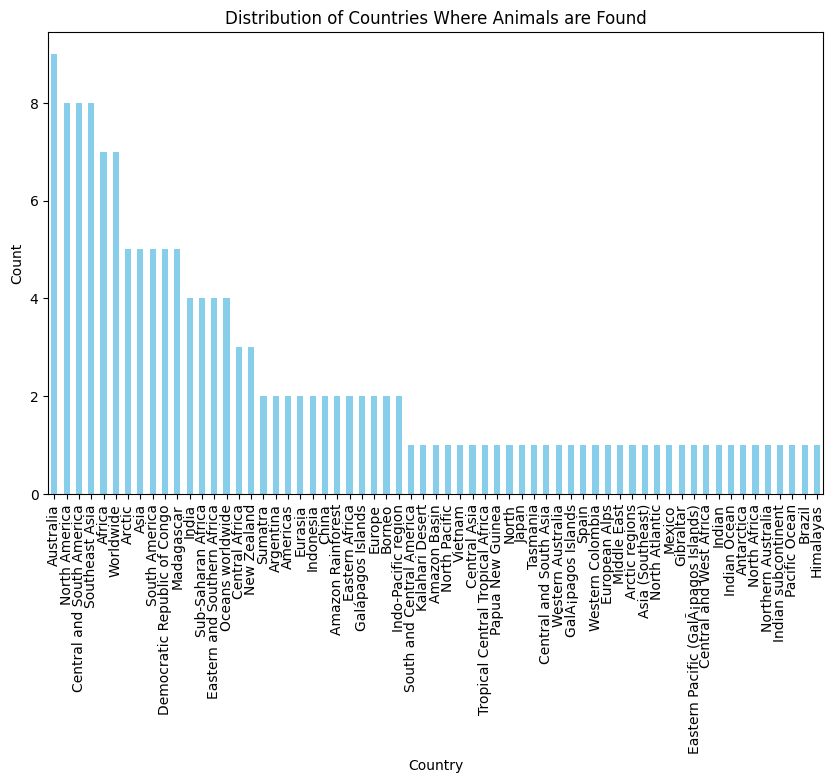

In [75]:

# Count the occurrences of each country
country_counts = df['Countries Found'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of countries
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries Where Animals are Found')
plt.show()

![](https://www.activewild.com/wp-content/uploads/2022/12/Animal-Habitats.jpg)

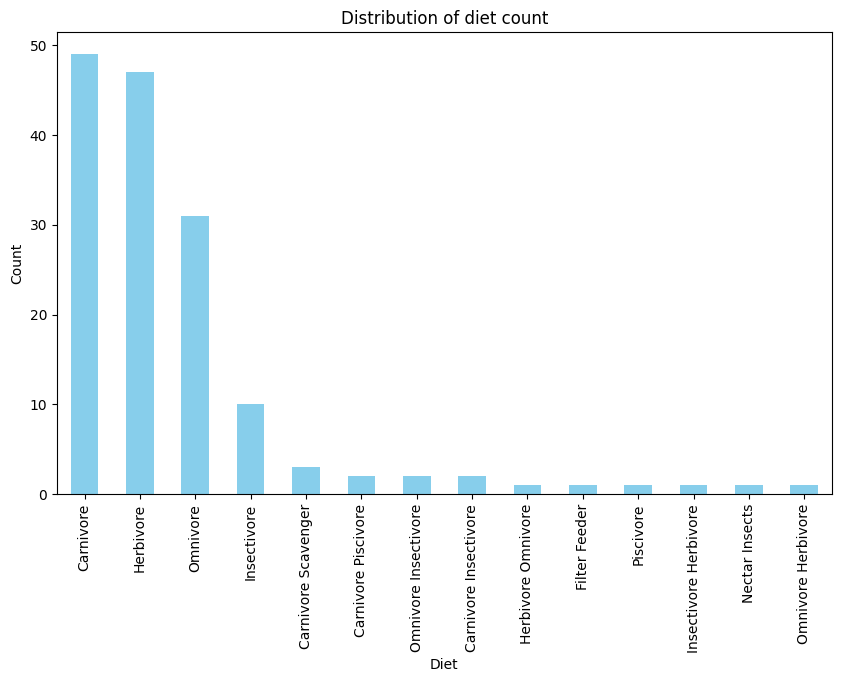

In [76]:
# Count the occurrences of each diet
country_counts = df['Diet'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of Diet
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Distribution of diet count')
plt.show()

![](https://evolutionletters.files.wordpress.com/2020/07/diets_2.png?w=940)

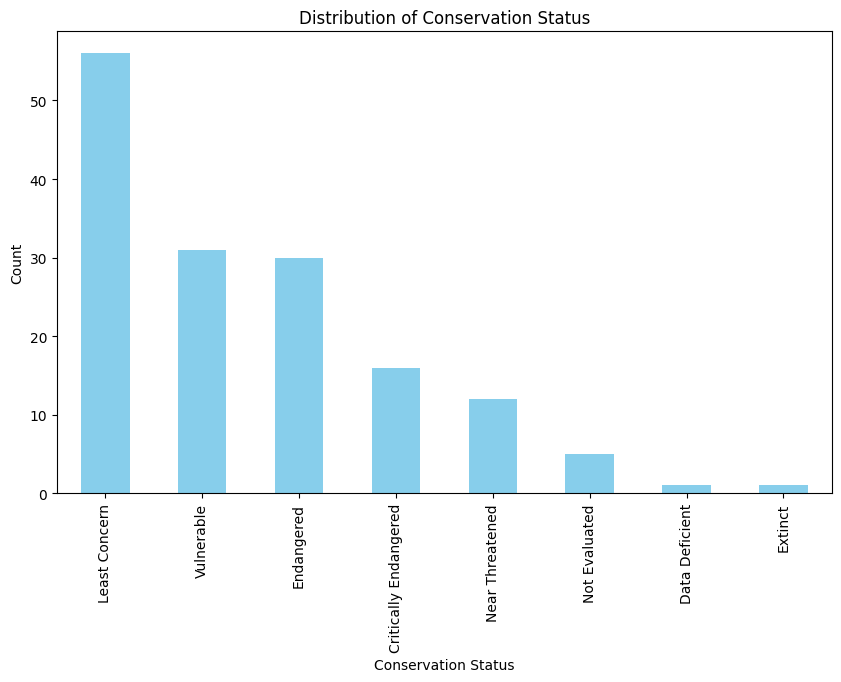

In [77]:
# Count the occurrences of each diet
country_counts = df['Conservation Status'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of Diet
country_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Distribution of Conservation Status')
plt.show()

![](https://www.drishtiias.com/images/blogs/The-Urgency-of-Protecting-Endangered-Species-from-Extinction-02.jpg)

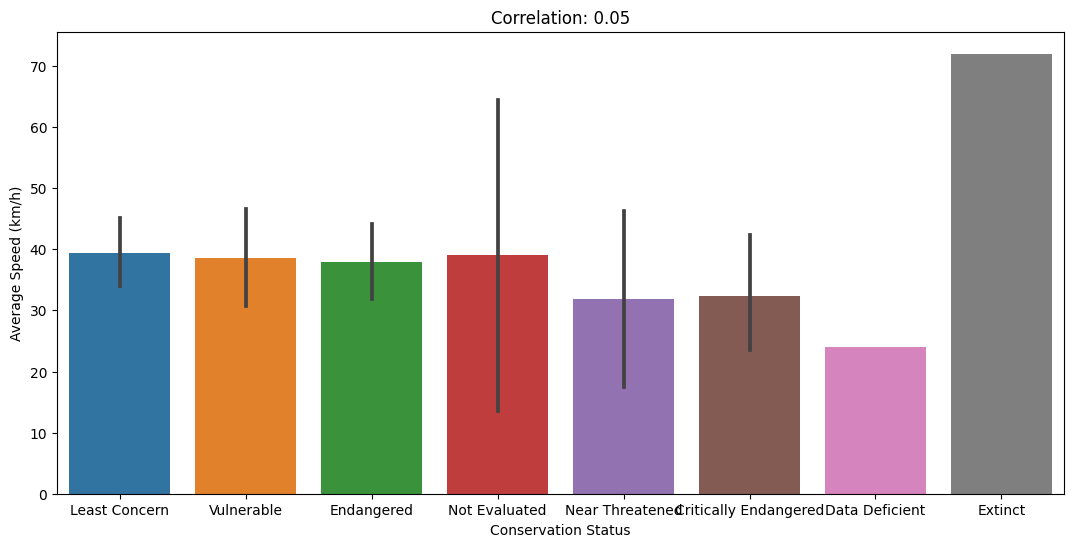

In [78]:
# Perform correlation analysis between Conservation Status and Average Speed
correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Average Speed (km/h)'])

# Create a bar plot to visualize the relationship
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Average Speed (km/h)', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

![](https://t3.ftcdn.net/jpg/06/04/77/90/360_F_604779040_XRt8bdycDQE1gwrHGE1uErpGUU1orid4.jpg)

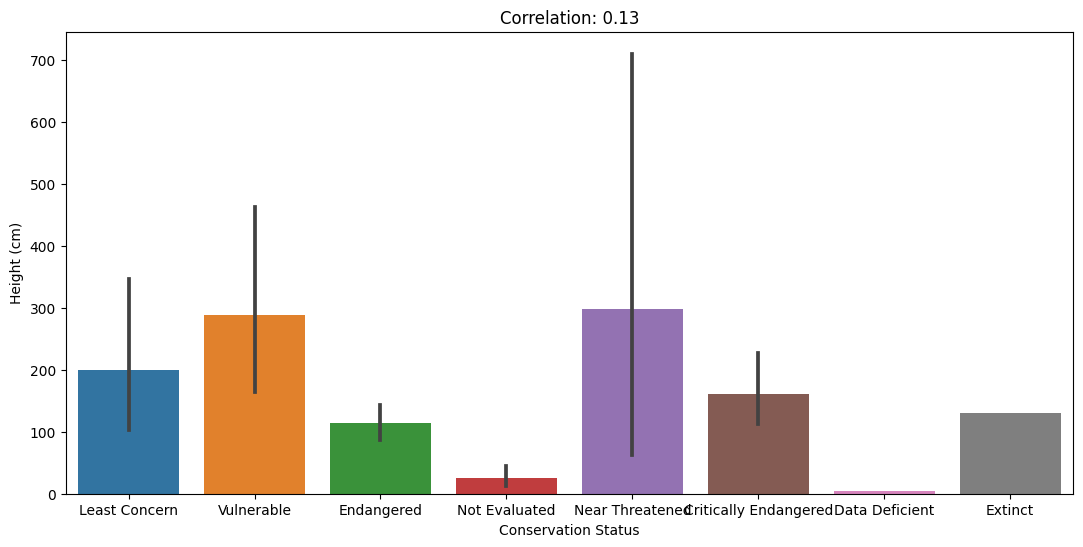

In [79]:
# Perform correlation analysis between Conservation Status and Height
correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Height (cm)'])

# Create a bar plot to visualize the relationship
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Height (cm)', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

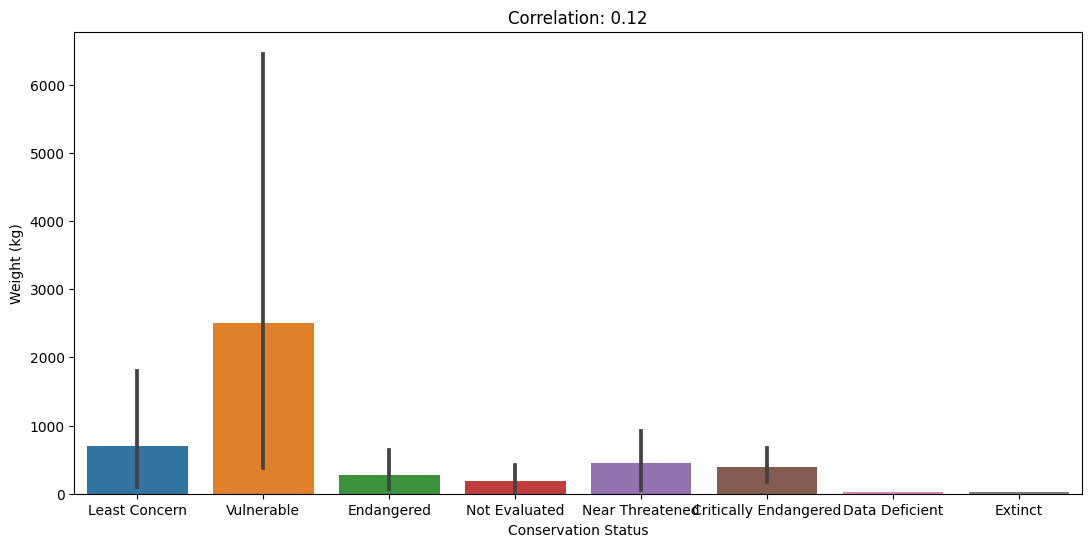

In [80]:
# Perform correlation analysis between Conservation Status and Weight
correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Weight (kg)'])

# Create a bar plot to visualize the relationship
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Weight (kg)', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

![](https://a-z-animals.com/media/2023/06/4d7cf46b71979111d2e30f795b42caa409610644-1024x576.jpg)

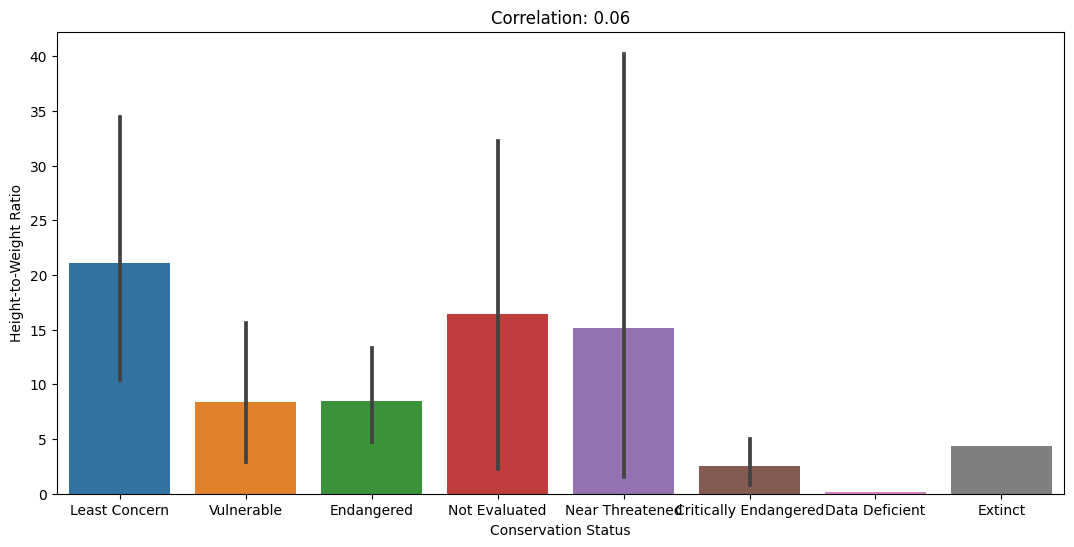

In [81]:

# Perform correlation analysis between Conservation Status and Weight
correlation = df['Conservation Status'].astype('category').cat.codes.corr(df['Height-to-Weight Ratio'])

# Create a bar plot to visualize the relationship
plt.figure(figsize=(13, 6))
sns.barplot(x='Conservation Status', y='Height-to-Weight Ratio', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

In [82]:
pd.DataFrame(df.groupby('Family')[['Habitat 1', 'Diet']].agg(pd.Series.unique))

,Habitat 1,Diet
Family,,
Accipitridae,"[Forests, Rainforests]",[Carnivore]
Agamidae,"[Deserts, Northern Australia]","[Omnivore, Insectivore Herbivore]"
Ailuridae,[Himalayan Foothills],[Herbivore]
Alcidae,"[North Atlantic, Coastal Areas]","[Carnivore Piscivore, Carnivore]"
Ambystomatidae,[Lakes],[Carnivore]
...,...,...
Trochilidae,[Americas],[Nectar Insects]
Ursidae,"[Forests, Temperate Broadleaf Forests, Arctic,...","[Omnivore, Herbivore, Carnivore]"
Varanidae,[Islands],[Carnivore]


This table gives us an ideea of unique habitats and Diet for each family group

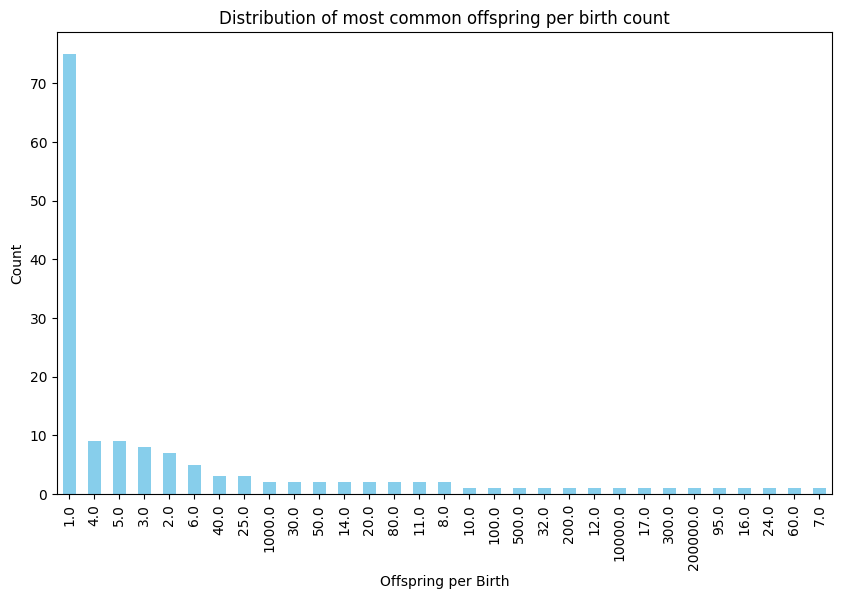

In [83]:

OffspringperBirth = df['Offspring per Birth'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of Diet
OffspringperBirth.plot(kind='bar', color='skyblue')
plt.xlabel('Offspring per Birth')
plt.ylabel('Count')
plt.title('Distribution of most common offspring per birth count')
plt.show()

![](https://i.insider.com/5be31891b73c2852152580a7?width=750&format=jpeg&auto=webp)

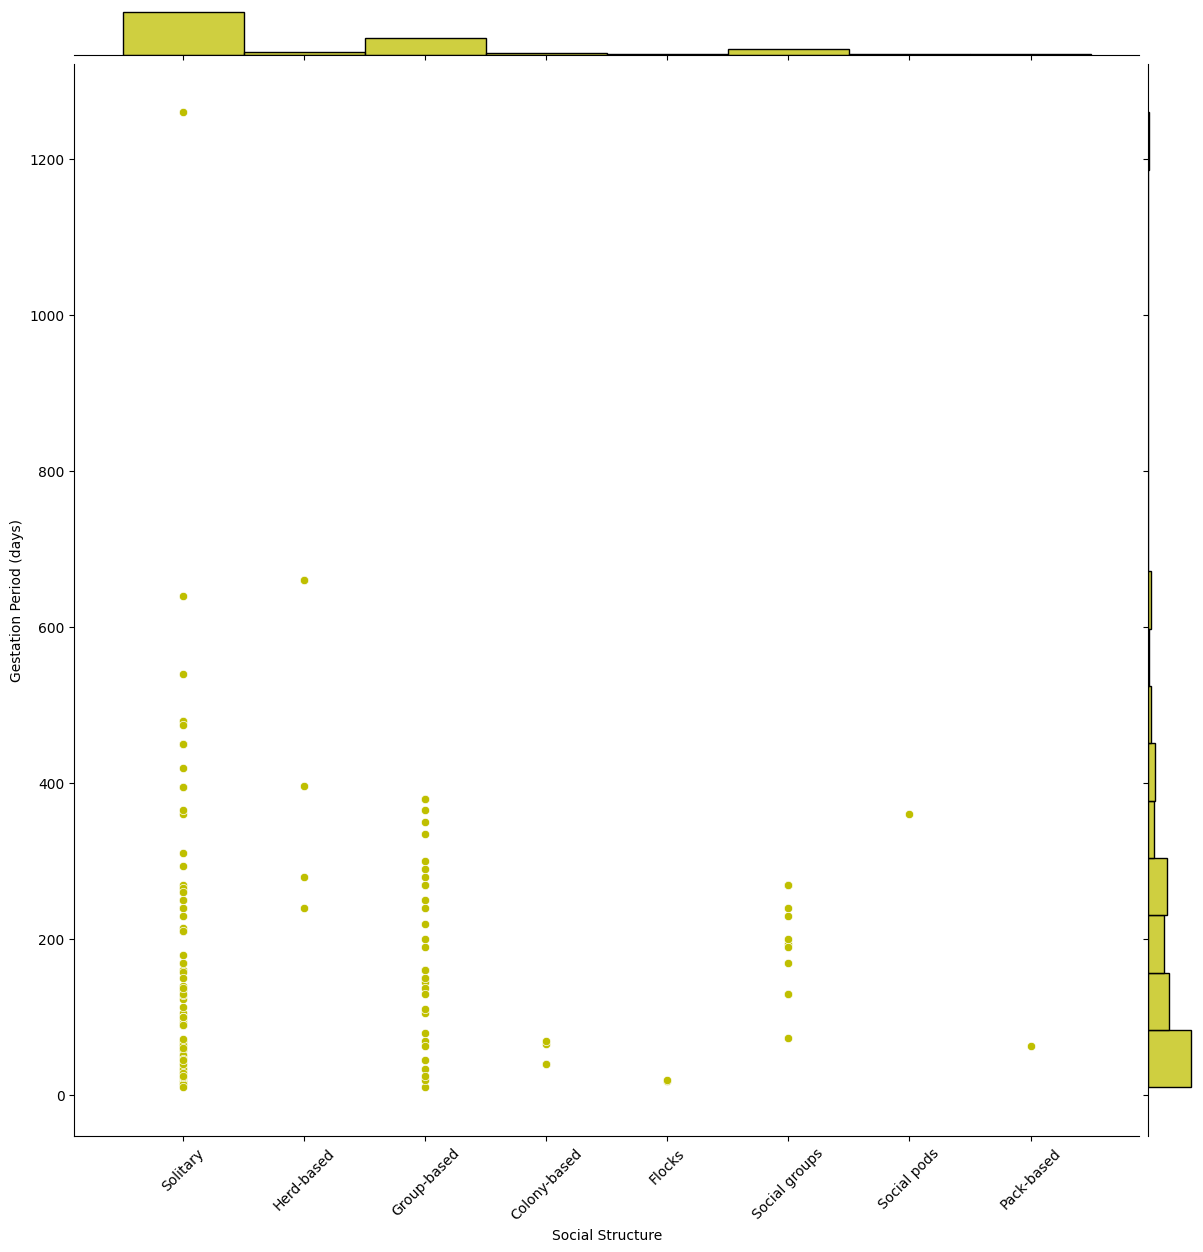

In [84]:
sns.jointplot(y="Gestation Period (days)", x="Social Structure", data=df, height=12, ratio=20, color="y")
plt.xticks(rotation=45)
plt.show()


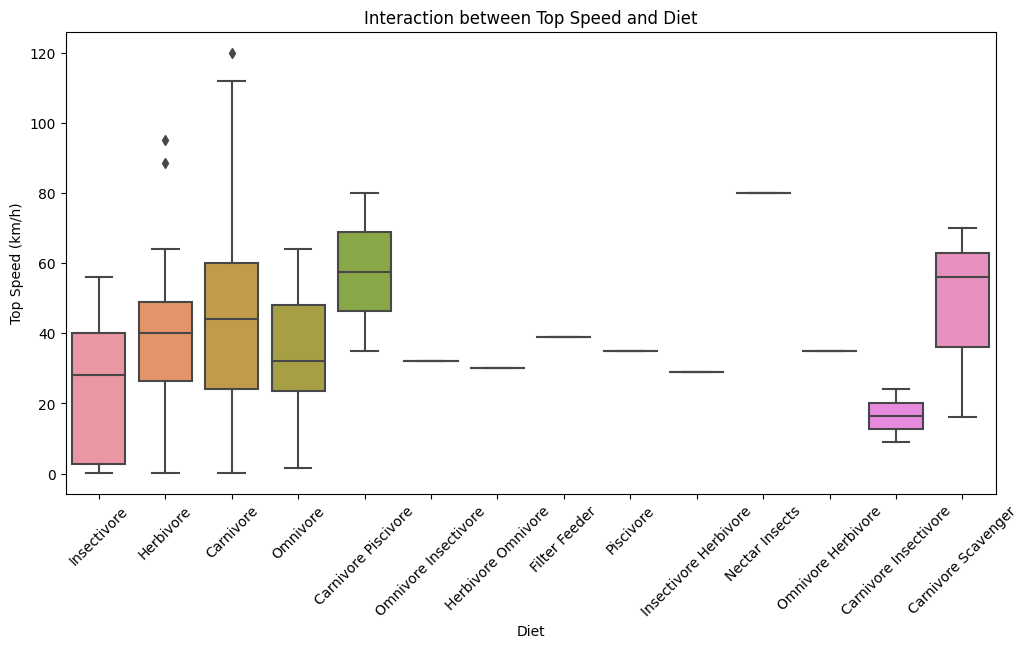

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diet', y='Top Speed (km/h)', data=df)
plt.title('Interaction between Top Speed and Diet')
plt.xlabel('Diet')
plt.ylabel('Top Speed (km/h)')
plt.xticks(rotation=45)
plt.show()

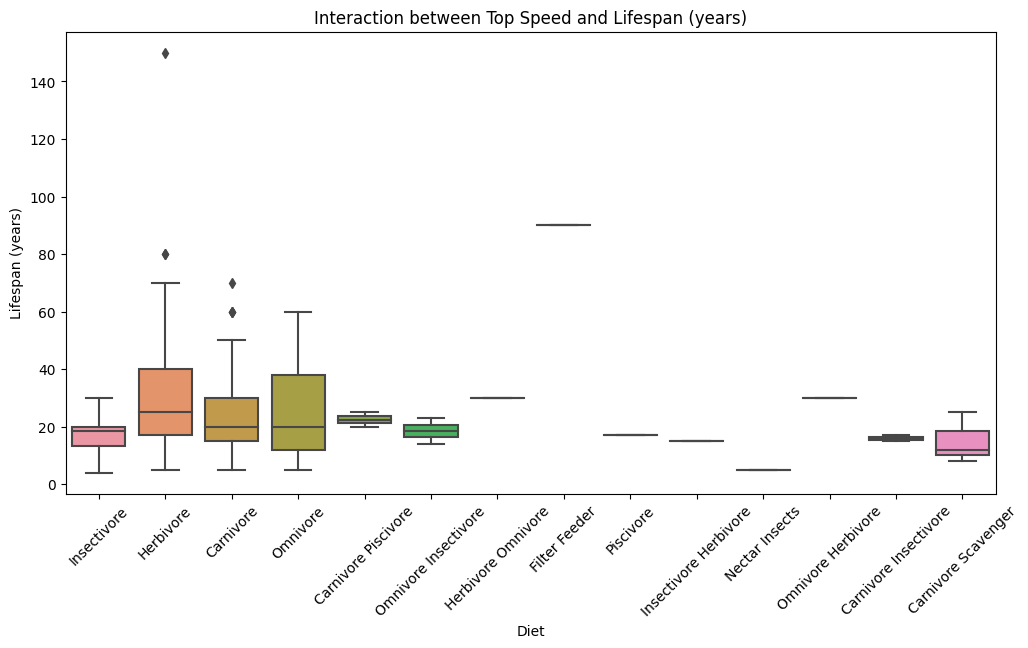

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diet', y='Lifespan (years)', data=df)
plt.title('Interaction between Top Speed and Lifespan (years)')
plt.xlabel('Diet')
plt.ylabel('Lifespan (years)')
plt.xticks(rotation=45)
plt.show()

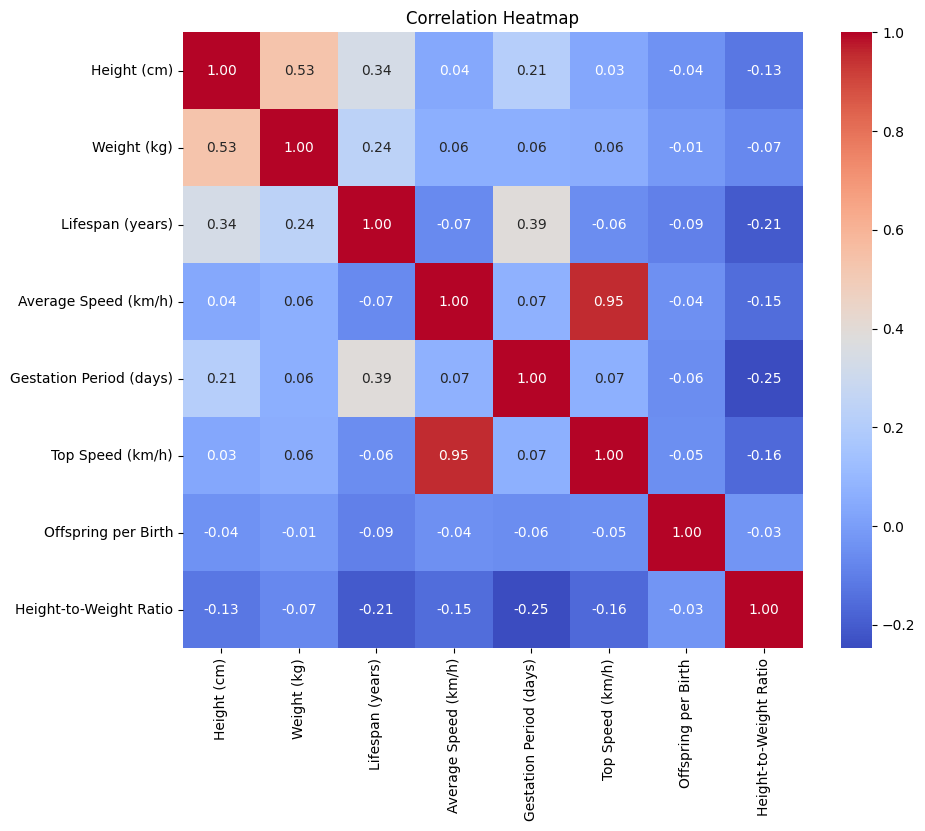

In [87]:
numeric_cols = [x for x in df.columns if df[x].dtype in ['float64', 'int64']]
correlation_matrix = df[numeric_cols].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

![](https://cdn2.wanderlust.co.uk/media/1034/alta_dreamstime_95607965.jpg?anchor=center&mode=crop&width=1920&height=0&format=auto&quality=90&rnd=131800080600000000)

![](https://m.media-amazon.com/images/I/71JI55dbljL.jpg)

![](https://i.imgflip.com/7abc56.jpg)